** I reload my folder from my directory : E:\Data Science Matters\Kaggle\Cyberquote **


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Csv File
# I. Set the Directory and load the dataset into R or Python, verify that the data is loaded correctly
import os
os.chdir("E:\Data Science Matters\Kaggle\Cyberquote")
real_dataset = pd.read_excel("Dataset_Employees.xlsx")
real_left_data = real_dataset[real_dataset["left"]==1]
dataset = real_dataset

# Explarotory Data Analysis
print(dataset.shape)
print(dataset.head(10))
dataset.dtypes

(14999, 10)
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3      

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

** The correlation between different types of variables **
It seems that every variable in the column depicts a very low correlation between one and each other. Some of them keep positive, and some of them are negative. The main important right here is where **satisfaction level** is not correlated with the ** Left Companies **, which is makes sense. However, the satisfaction level seems to have positive correlation with the Work Accident. 

In [43]:
# Data Preprocessing
# Change the dataset object into the numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["salary"] = le.fit_transform(dataset["salary"])
dataset["department"] = le.fit_transform(dataset["department"])

# II. Find the correlation between different values
# Multiple Correlation between these two 
# Using Pearson Correlation
corr = dataset.corr(method = "pearson")
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,-0.388375,0.0256052,0.0031533,0.0117542
last_evaluation,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,0.00656712,-0.00868377,0.00777212,0.0139649
number_project,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,0.0237872,-0.00606396,0.00926828,0.00967176
average_montly_hours,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,0.0712872,-0.00354441,0.00391313,0.00708196
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.144822,0.0674329,-0.0180096,-0.00308626
Work_accident,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,-0.154622,0.0392454,0.00342508,-0.00250561
left,-0.388375,0.00656712,0.0237872,0.0712872,0.144822,-0.154622,1,-0.0617881,0.0321053,-0.00129372
promotion_last_5years,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,-0.0617881,1,-0.0273359,-0.00131842
department,0.0031533,0.00777212,0.00926828,0.00391313,-0.0180096,0.00342508,0.0321053,-0.0273359,1,0.000684708
salary,0.0117542,0.0139649,0.00967176,0.00708196,-0.00308626,-0.00250561,-0.00129372,-0.00131842,0.000684708,1


 ** III.	Visualize the characteristics of the whole data and only the people who left, use plots and histograms**
    We compare between the people who left and the whole dataset. Satisfaction Level seems to be quite tricky, where some of the left employees are satisfied with the Job. But mostly they are not satisfied with their job. This is also happening with the Last_Evaluation as well. 
    
Besides, the people who has 2 projects lead to become the highest level of people who leave the company, followed by 6 number of projects. The average monthly hours everyday has shown the same thing happens with the number of projects. 
    
Looking forward to the Department, it seemed that Sales Department is the highest number of left people, followed by technical teams. The Low Salary also leads to become the highest reason of people leave the company. 
 

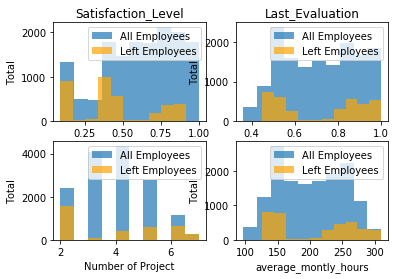

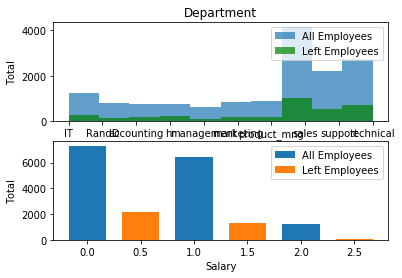

In [44]:
# III.	Visualize the characteristics of the whole data and only the people who left, use plots and histograms
import matplotlib.pyplot as plt
left_data = dataset[dataset["left"]==1]

# Characteristic level in
left_data["satisfaction_level"]

fig, axs = plt.subplots(2,2)
axs[0,0].hist(dataset["satisfaction_level"], alpha = 0.7, label = "All Employees")
axs[0,0].hist(left_data["satisfaction_level"], alpha = 0.7, facecolor = "orange", label = "Left Employees")
axs[0,0].legend(loc="upper right")
axs[0,0].set_title('Satisfaction_Level')
axs[0,0].set_ylabel('Total')

axs[0,1].hist(dataset["last_evaluation"], alpha = 0.7, label = "All Employees")
axs[0,1].hist(left_data["last_evaluation"], alpha = 0.7, facecolor = "orange", label = "Left Employees")
axs[0,1].legend(loc="upper right")
axs[0,1].set_title('Last_Evaluation')
axs[0,1].set_ylabel("Total")

axs[1,0].hist(dataset["number_project"], alpha = 0.7, label = "All Employees")
axs[1,0].hist(left_data["number_project"], alpha = 0.7, facecolor = "orange", label = "Left Employees")
axs[1,0].legend(loc="upper right")
axs[1,0].set_xlabel('Number of Project')
axs[1,0].set_ylabel('Total')

axs[1,1].hist(dataset["average_montly_hours"], alpha = 0.7, label = "All Employees")
axs[1,1].hist(left_data["average_montly_hours"], alpha = 0.7, facecolor = "orange", label = "Left Employees")
axs[1,1].legend(loc="upper right")
axs[1,1].set_xlabel('average_montly_hours')
axs[1,1].set_ylabel("Total")

new_data = real_dataset["salary"].value_counts()
new_data_left = real_left_data["salary"].value_counts()

fig1, axt = plt.subplots(2)
axt[0].hist(real_dataset["department"], alpha = 0.7, label = "All Employees")
axt[0].hist(real_left_data["department"], alpha = 0.7, facecolor = "green", label = "Left Employees")
axt[0].legend(loc="upper right")
axt[0].set_title('Department')
axt[0].set_ylabel('Total')

X = np.arange(3)
bar_width = 0.35
axt[1].bar(X, new_data, bar_width, label = "All Employees")
axt[1].bar(X + 0.5, new_data_left, bar_width, label = "Left Employees")
axt[1].legend(loc="upper right")
axt[1].set_xlabel('Salary')
axt[1].set_ylabel('Total')
plt.show()

** Evaluate the Values of each attributes for both left and non-left employees **


In [52]:
# IV.	Evaluate the values of each attributes for both left and non-left employees
# Satisfaction Level
print("Satisfaction Level - All Employees - Mean",np.mean(real_dataset["satisfaction_level"]))
print("Satisfaction Level - Left Employees - Mean", np.mean(left_data["satisfaction_level"]))
print("-"*50)

# Last Evaluation
print("Last Evaluation- All Employees",np.mean(real_dataset["last_evaluation"]))
print("Last Evaluation - Left Employees", np.mean(left_data["last_evaluation"]))
print("-"*50)

# Number of project
print(real_dataset["number_project"].value_counts())
print(left_data["number_project"].value_counts())

# Average Monthly Hours
print("Average Monthly Hours - All Employees",np.mean(real_dataset["average_montly_hours"]))
print("Average Monthly Hours - Leff Employees",np.mean(left_data["average_montly_hours"]))

# Time Spend Company
print("Time Spend Company - All", real_dataset["time_spend_company"].value_counts())
print("Time Spend Company - Left", left_data["time_spend_company"].value_counts())

# Work Accident
print(real_dataset["Work_accident"].value_counts())
print(left_data["Work_accident"].value_counts())

Satisfaction Level - All Employees - Mean 0.6128335222348166
Satisfaction Level - Left Employees - Mean 0.44009801176140917
--------------------------------------------------
Last Evaluation- All Employees 0.7161017401159978
Last Evaluation - Left Employees 0.7181125735088183
--------------------------------------------------
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64
Average Monthly Hours - All Employees 201.0503366891126
Average Monthly Hours - Leff Employees 207.41921030523662
Time Spend Company - All 3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
Time Spend Company - Left 3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64
0    12830
1     2169
Name: Work_accident, dtype: int64
0    3402
1     169
Name: Work_accident, dtyp

** Analyse the Department Wise Turnouts and Find Out the Percentage of Employees**
The most leaving places is Sales, however, that one if we see from the total number of employees. 
From the percentage analysis, HR is the highest one compared to others. 

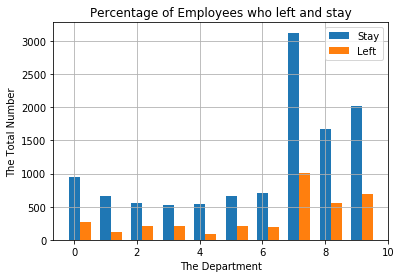

             Stay  Left
department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


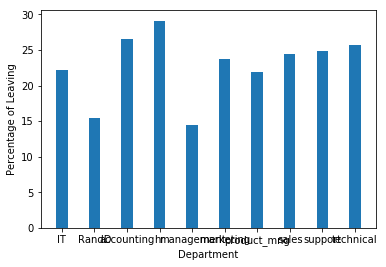

In [79]:
# V.	Analyze the department wise turnouts and find out the percentage of employees 
pivoting = pd.pivot_table(real_dataset, columns = "left", values = "salary", index = "department", aggfunc = "count")
pivoting.columns = ["Stay", "Left"]
X = np.arange(0,10)

plt.bar(X, pivoting["Stay"], bar_width, label = "Stay")
plt.bar(X + bar_width, pivoting["Left"], bar_width, label = "Left")
plt.grid(True)
plt.title("Percentage of Employees who left and stay")
plt.xlabel("The Department")
plt.ylabel("The Total Number")
plt.legend(loc="upper right")
plt.show()

print(pivoting)

# Percentage Leaving of the total employees
percentage = pivoting["Left"] / (pivoting["Stay"] + pivoting["Left"]) * 100
percentage = percentage.reset_index("department")
percentage.columns = ["department", "percentage"]

plt.bar(percentage["department"], percentage["percentage"],bar_width)
plt.xlabel("Department")
plt.ylabel("Percentage of Leaving")
plt.show()

** This is very brief overview to identify which classification model is the best **
- We may use the Gridsearch CV or iterate one by one. 
Due to the limited time, I think I'm going to sum up with the Iterate one. The Gridsearch CV needs a lot of iteration that the system will able to identify the most accurate model in here

- I am going to use a very brief of parameter inside Decision Tree, Random forest, Naive Bayes, and SVM (rbf)
. The best parameter that we already calculate is the Random Forest



In [91]:
# VII Deploy the Classification Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
X = dataset.drop(["left"], axis = 1)
y = dataset["left"]

# Splitting the Dataset to Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=41)

def classification(input_data, title, X_train, y_train, X_test, y_test):
    input_data.fit(X_train, y_train)
    
    # Predicting the Training and Testing Data
    train_pred = input_data.predict(X_train)
    test_pred = input_data.predict(X_test)

    # Printing the Solution
    print("Train accuracy decision tree:",title, accuracy_score(y_train,train_pred))
    print("Test accuracy decision tree:", title,accuracy_score(y_test,test_pred))
    print(40*"--")

# Decision Tree
dt_clf = DecisionTreeClassifier(criterion = "entropy",min_samples_leaf = 10, min_samples_split = 20,random_state =111)

# Random Forest
dt_rnf = RandomForestClassifier(criterion = "entropy",min_samples_leaf = 10, min_samples_split = 20, random_state =111)

# Naive Bayes
dt_nvb = GaussianNB()

# SVC
classifier = SVC(kernel = 'rbf', random_state = 111)

classification(dt_clf, "Decision Tree",X_train, y_train, X_test, y_test)
classification(dt_rnf, "Random Forest",X_train, y_train, X_test, y_test)
classification(dt_nvb, "Naive Bayes", X_train, y_train, X_test, y_test)
classification(classifier, "SVM", X_train, y_train, X_test, y_test)


print(X_train)

Train accuracy decision tree: Decision Tree 0.979331364892
Test accuracy decision tree: Decision Tree 0.974
--------------------------------------------------------------------------------
Train accuracy decision tree: Random Forest 0.977140680065
Test accuracy decision tree: Random Forest 0.976
--------------------------------------------------------------------------------
Train accuracy decision tree: Naive Bayes 0.789408515097
Test accuracy decision tree: Naive Bayes 0.789333333333
--------------------------------------------------------------------------------
Train accuracy decision tree: SVM 0.960948661777
Test accuracy decision tree: SVM 0.951555555556
--------------------------------------------------------------------------------
       satisfaction_level  last_evaluation  number_project  \
744                  0.39             0.52               2   
12082                0.79             0.59               4   
10299                0.76             0.98               4   
14

** Visualizing is the best way to forecast what are the attributes model of the company**
By visualizing the Random Forest, we able to know what kind of attributes to identify the attributes each level. 

In [106]:
# VI : Classification Model to forecast what are the attributes of people who leave he company
# We have identified the best parameter is the Random Forest
dt_rnf = RandomForestClassifier(criterion = "entropy",n_estimators = 10, min_samples_leaf = 10, min_samples_split = 20, random_state =111)
dt_rnf.fit(X,y)

estimator = dt_rnf.estimators_[5]
print(estimator)
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X["satisfaction_level"],
                class_names = y,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1520016659, splitter='best')


ValueError: Length of feature_names, 14999 does not match number of features, 9